<a href="https://colab.research.google.com/github/Kwesi-Welbred/Artficial-Intelligence/blob/master/hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tuner

     |████████████████████████████████| 96 kB 3.3 MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-py3-none-any.whl size=9568 sha256=31df48581f1d1ee31f6adb57907cdbdbe736e57a7565f18cbdad0b6327d87779
  Stored in directory: /root/.cache/pip/wheels/38/5c/e0/13003e68c17f403af40b92a24d20171b95fef13b0fdaba833c
Successfully built kt-legacy


**Importing the required libraries**

In [2]:
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt
import numpy as np



Downloading the data set

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Data visualzation

In [6]:
x_train.shape

(60000, 28, 28)

In [5]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

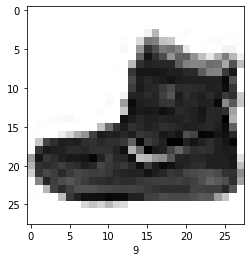

In [12]:
plt.imshow(x_train[0], cmap='binary')
plt.xlabel(y_train[0])
plt.show()

In [49]:
#Creating the model

def create_model(hp):
  #defining the hyperparameters and search space
      if hp:
        dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5)
        num_units = hp.Choice('num_units', values=[8, 16, 32])
        learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.1)
        num_hidden_layers = hp.Choice('num_hidden_layers', values=[1, 2, 3])

      else:
        dropout_rate = 0.1
        num_units = 8
        learning_rate = 1e-4
        num_hidden_layers = 1
  
    #the model
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Flatten(Input_shape = (28,28)))
        model.add(tf.keras.layers.Lambda(lambda x:x/255))


      for _ in range (0, num_hidden_layers):

        model.add(tf.keras.layers.Dense(num_units, activation='relu'))
        model.add(tf.keras.layers.Dropout(drop_out_rate))# reducing any noise in the database
        model.add(tf.keras.layers.Dense(10,activation='softmax'))

      #compiling the model
      model.compile(
        loss = 'sparse_categorical_crossentropy',
        optimizer = tf.keras.optimizers.Adam(learning_rate=lrate),
        metrics = ['accuracy']

    )
      return model

